In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final.csv to final.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['final.csv']))
df

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.000000,0.1590,0.532,133.061,196707,4,30.88059,13,1
1,1,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,242587,4,41.51106,10,1
2,2,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13,0
3,3,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.078400,0.1920,0.333,148.440,255667,4,58.59528,9,0
4,4,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,5515,0.396,0.795,9,-6.070,0,0.2340,0.000928,0.000209,0.1820,0.762,152.943,82107,4,30.34109,6,0
41102,5516,0.621,0.655,9,-6.281,0,0.0309,0.050600,0.006260,0.0937,0.690,134.167,211653,4,34.89506,10,0
41103,5517,0.562,0.314,10,-15.213,0,0.0298,0.440000,0.000011,0.1060,0.571,166.847,189827,4,21.11763,10,1
41104,5518,0.622,0.781,7,-6.080,1,0.0368,0.000101,0.755000,0.3830,0.214,120.051,330053,4,47.13558,11,0


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.000000,0.1590,0.532,133.061,196707,4,30.88059,13,1
1,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,242587,4,41.51106,10,1
2,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13,0
3,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.078400,0.1920,0.333,148.440,255667,4,58.59528,9,0
4,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,0.396,0.795,9,-6.070,0,0.2340,0.000928,0.000209,0.1820,0.762,152.943,82107,4,30.34109,6,0
41102,0.621,0.655,9,-6.281,0,0.0309,0.050600,0.006260,0.0937,0.690,134.167,211653,4,34.89506,10,0
41103,0.562,0.314,10,-15.213,0,0.0298,0.440000,0.000011,0.1060,0.571,166.847,189827,4,21.11763,10,1
41104,0.622,0.781,7,-6.080,1,0.0368,0.000101,0.755000,0.3830,0.214,120.051,330053,4,47.13558,11,0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
Features=df[['danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_ms','time_signature','chorus_hit','sections']]
target=df[['target']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.09844758 0.08255171 0.04464957 0.0675028  0.01365734 0.0604546
 0.1035868  0.17613304 0.05003743 0.07300017 0.05148681 0.06254095
 0.01480727 0.04864809 0.05249584]


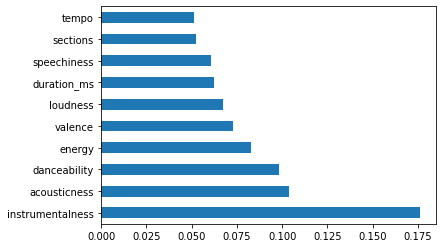

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier                #measuring feature importance
model = ExtraTreesClassifier()
model.fit(Features,target)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Features.columns)              
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
df.target.value_counts()           #Seeing if the dataset is balanced or not

1    20553
0    20553
Name: target, dtype: int64

**THE DATASET IS BALANCED**


 **SHUFFLING THE DATASET**

In [ ]:
df = df.sample(frac = 1)                

In [ ]:
print("\nShuffled DataFrame:") 
print(df.head())


Shuffled DataFrame:
       danceability  energy  key  ...  chorus_hit  sections  target
22525         0.410   0.494    7  ...    28.23437        28       0
31084         0.611   0.382    8  ...    20.49498        16       0
980           0.434   0.148    7  ...    32.51601        10       0
15845         0.360   0.463    2  ...    28.17072         9       1
7793          0.771   0.695    2  ...    44.53293        10       0

[5 rows x 16 columns]


**STANDARDIZATION OF INPUTS**

In [ ]:
from sklearn import preprocessing
unscaled_inputs = df.iloc[:,0:-1]
target = df.iloc[:,[-1]]
scaled_inputs = preprocessing.scale(unscaled_inputs)

**SPLITTING THE DATASET**

In [ ]:
samples_count = scaled_inputs.shape[0]
train_samples_count = int(0.8*samples_count)
validation_samples_count = int(0.1*samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

In [ ]:

train_inputs = scaled_inputs[:train_samples_count]
train_targets = target[:train_samples_count]

In [ ]:

validation_inputs = scaled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = target[train_samples_count:train_samples_count+validation_samples_count]

In [ ]:

test_inputs = scaled_inputs[train_samples_count+validation_samples_count:]
test_targets = target[train_samples_count+validation_samples_count:]

In [ ]:

print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

target    16428
dtype: int64 32884 target    0.499574
dtype: float64
target    2046
dtype: int64 4110 target    0.49781
dtype: float64
target    2079
dtype: int64 4112 target    0.505593
dtype: float64


In [ ]:


np.savez('Spotify_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Spotify_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Spotify_data_test', inputs=test_inputs, targets=test_targets)

In [ ]:
npz = np.load('Spotify_data_train.npz')
train_inputs = npz['inputs'].astype(np.float)
train_targets = npz['targets'].astype(np.int)
npz = np.load('Spotify_data_validation.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)
npz = np.load('Spotify_data_test.npz')
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)


**MODEL**

In [ ]:
input_size = 15 
output_size = 2 
hidden_layer_size = 50 
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), 
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), 
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), 
    
    tf.keras.layers.Dense(output_size, activation='softmax') 
])

In [ ]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 300
max_epochs = 6
history = model.fit(  train_inputs, 
                      train_targets, 
                      batch_size=batch_size, 
                      epochs=max_epochs, 
                      validation_data=(validation_inputs, validation_targets), 
                      verbose = 2)  

Epoch 1/6
110/110 - 0s - loss: 0.5479 - accuracy: 0.7109 - val_loss: 0.5016 - val_accuracy: 0.7518
Epoch 2/6
110/110 - 0s - loss: 0.4907 - accuracy: 0.7596 - val_loss: 0.4892 - val_accuracy: 0.7594
Epoch 3/6
110/110 - 0s - loss: 0.4796 - accuracy: 0.7677 - val_loss: 0.4815 - val_accuracy: 0.7623
Epoch 4/6
110/110 - 0s - loss: 0.4722 - accuracy: 0.7716 - val_loss: 0.4832 - val_accuracy: 0.7640
Epoch 5/6
110/110 - 0s - loss: 0.4682 - accuracy: 0.7751 - val_loss: 0.4756 - val_accuracy: 0.7681
Epoch 6/6
110/110 - 0s - loss: 0.4637 - accuracy: 0.7766 - val_loss: 0.4737 - val_accuracy: 0.7706


**VISUALIZATION**

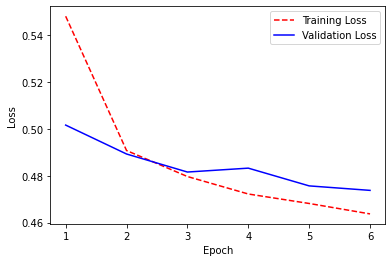

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

129/129 [==============================] - 0s 929us/step - loss: 0.4761 - accuracy: 0.7670

Test loss: 0.48. Test accuracy: 76.70%


In [ ]:
model.save("model_final.h5")

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
prediction=model.predict([[4,2,1,4,3,9,4,2,5,6,3,6,6,3,8]])
prediction

array([[9.995808e-01, 4.191805e-04]], dtype=float32)

In [ ]:
np.argmax(prediction)

0

In [ ]:
model=tf.keras.models.load_model("model_final.h5")

In [ ]:
!pip install flask-ngrok

In [ ]:
import numpy as np
from flask_ngrok import run_with_ngrok
#Keras#
from tensorflow.keras.models import load_model
#flask#
from flask import Flask, request,render_template,jsonify
from werkzeug.utils import secure_filename

#defining flask app#
app = Flask(__name__)
run_with_ngrok(app)
#model_path#
MODEL_PATH = 'model_final.h5'

# Load your trained model
model = load_model(MODEL_PATH)
          # Necessary
print('Model loaded. Check http://127.0.0.1:5000/')  # print('Model loaded. Start serving...')


@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    input_features=[float(x) for x in request.form.values()]
    features_value=np.expand_dims(np.array(input_features),axis=0)
    output=model.predict(features_value)
    result=np.argmax(output)
    if(result==0):
        return render_template("result.html",prediction_text='This song is a flop song')

    else:
        return render_template('result.html',prediction_text='This song is a hit song')

app.run()


Model loaded. Check http://127.0.0.1:5000/
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://574e06e4874c.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [ ]:
!mkdir templates
!mkdir static
%cp index.html templates/ 

In [ ]:
%cp result.html templates/
%cp styles.css static/

In [ ]:
pip freeze

absl-py==0.10.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.3.0
astor==0.8.1
astropy==4.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.2.0
audioread==2.1.9
autograd==1.3
Babel==2.8.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.2.1
blis==0.4.1
bokeh==2.1.1
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.1.1
catalogue==1.0.0
certifi==2020.6.20
cffi==1.14.3
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.4
Cython==0.29.21
daft==0.0.4
dask==2.12.0
dataclasses==0.7
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
Django==3.1.3
dlib==19.18.0
dm-tree==0.1.5
docopt==0.6.2
docutil